In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn as sln
import seaborn as sns
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
bos_ind = pd.DataFrame(boston.data,columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])

In [3]:
bos_ind

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
bos_tar = pd.DataFrame(boston.target,columns=['Price'])
bos_tar

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [5]:
bos = pd.concat([bos_ind,bos_tar],axis=1)

In [6]:
bos.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [7]:
bos.shape

(506, 14)

In [8]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


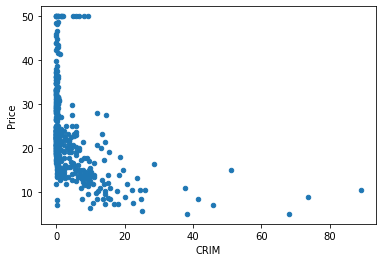

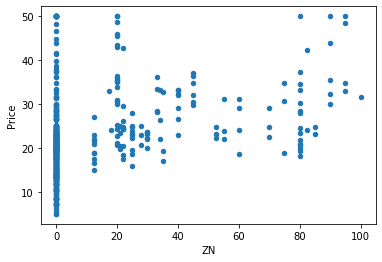

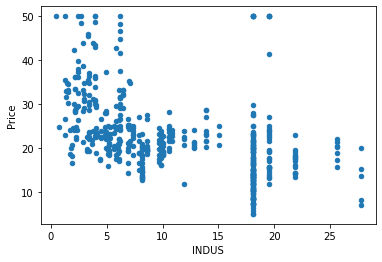

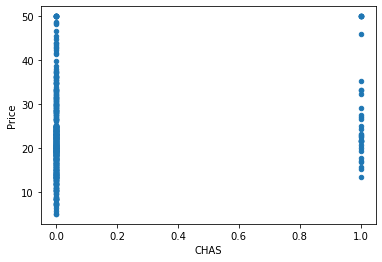

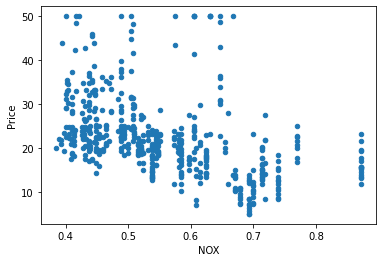

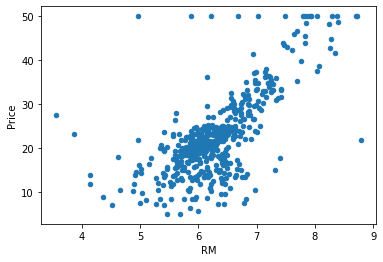

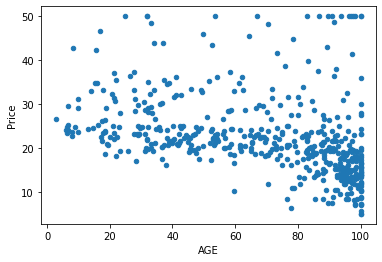

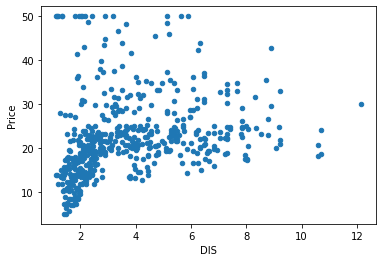

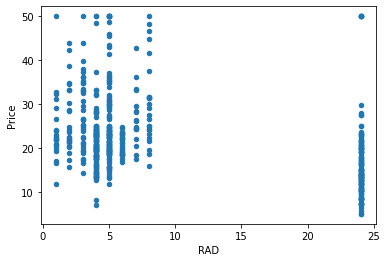

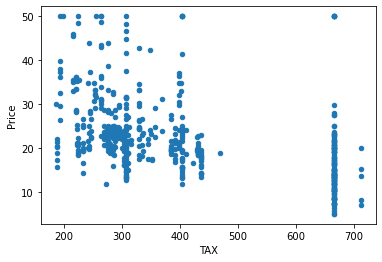

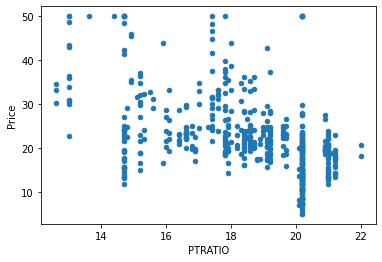

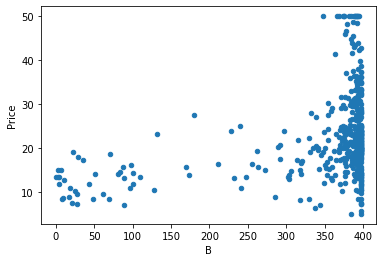

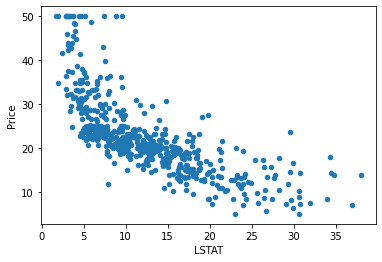

In [10]:
for col in bos_ind.columns:
    bos.plot(kind='scatter', x=col, y='Price')

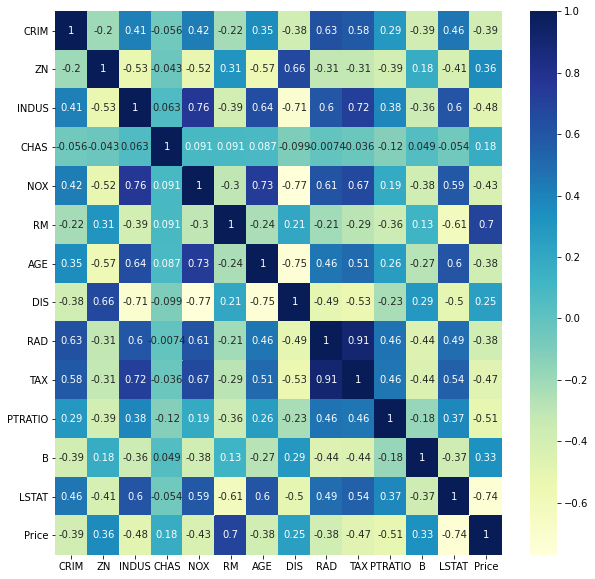

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(bos.corr(),annot=True,cmap="YlGnBu")

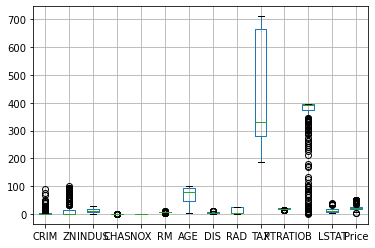

In [11]:
bos.boxplot()

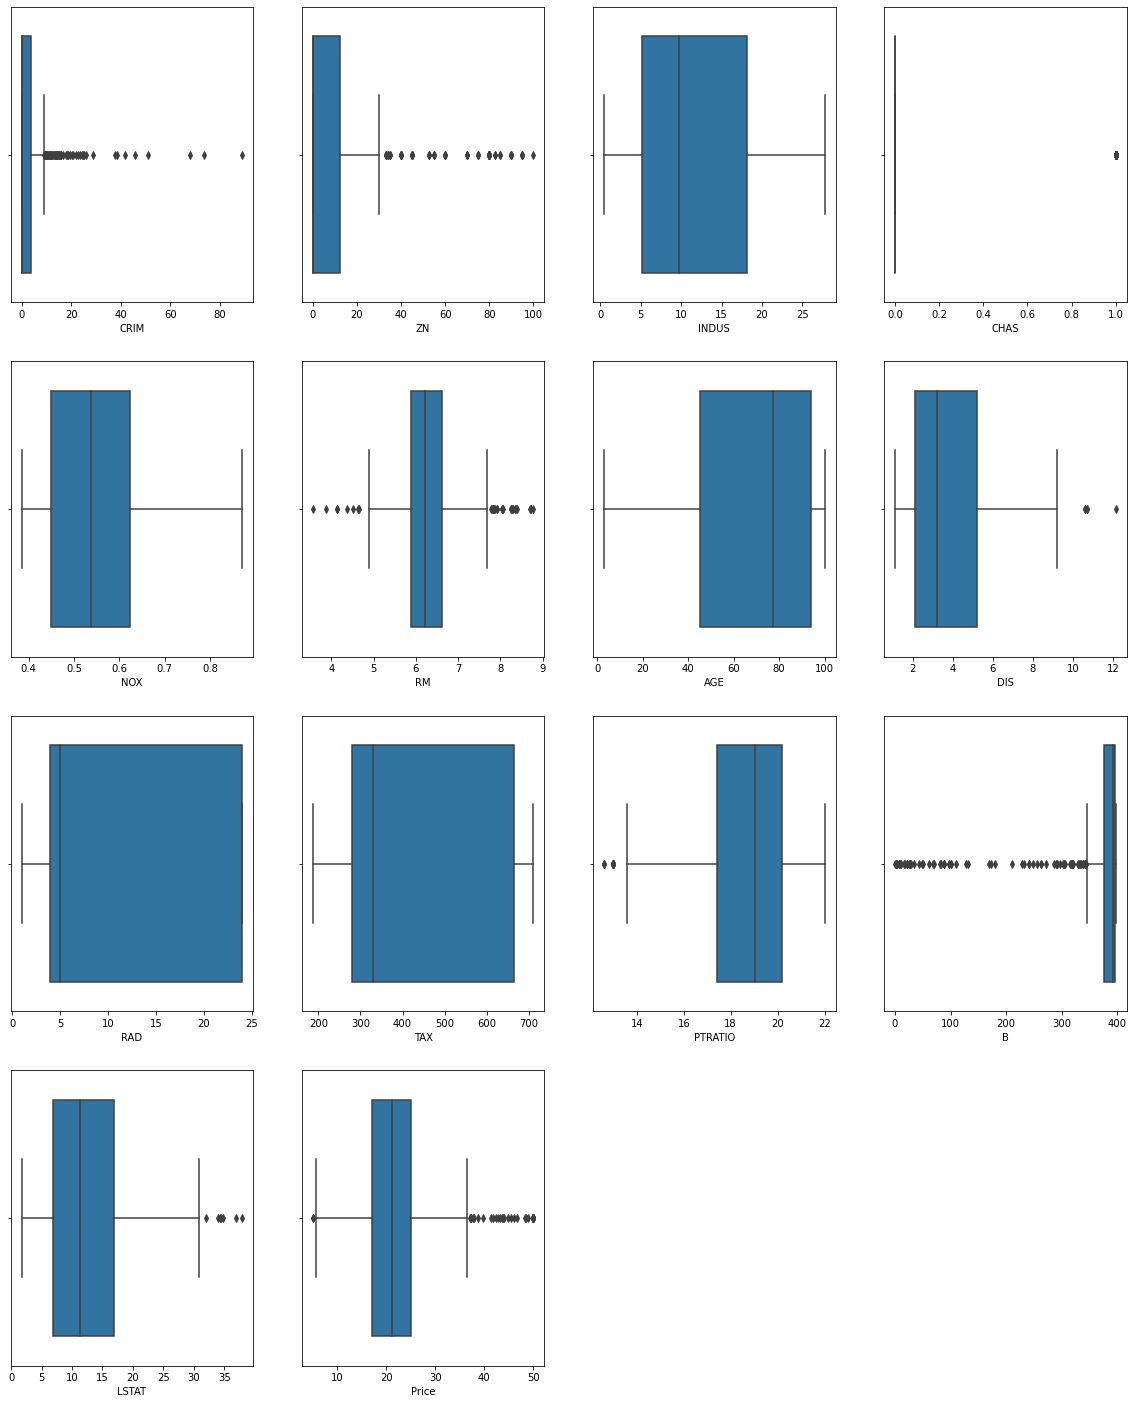

In [12]:
plt.figure(figsize=(20,25))
plot_number =1
for col in bos.columns:
    if plot_number<=14:
        ax=plt.subplot(4,4,plot_number)
        sns.boxplot(bos[col])
    plot_number +=1

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


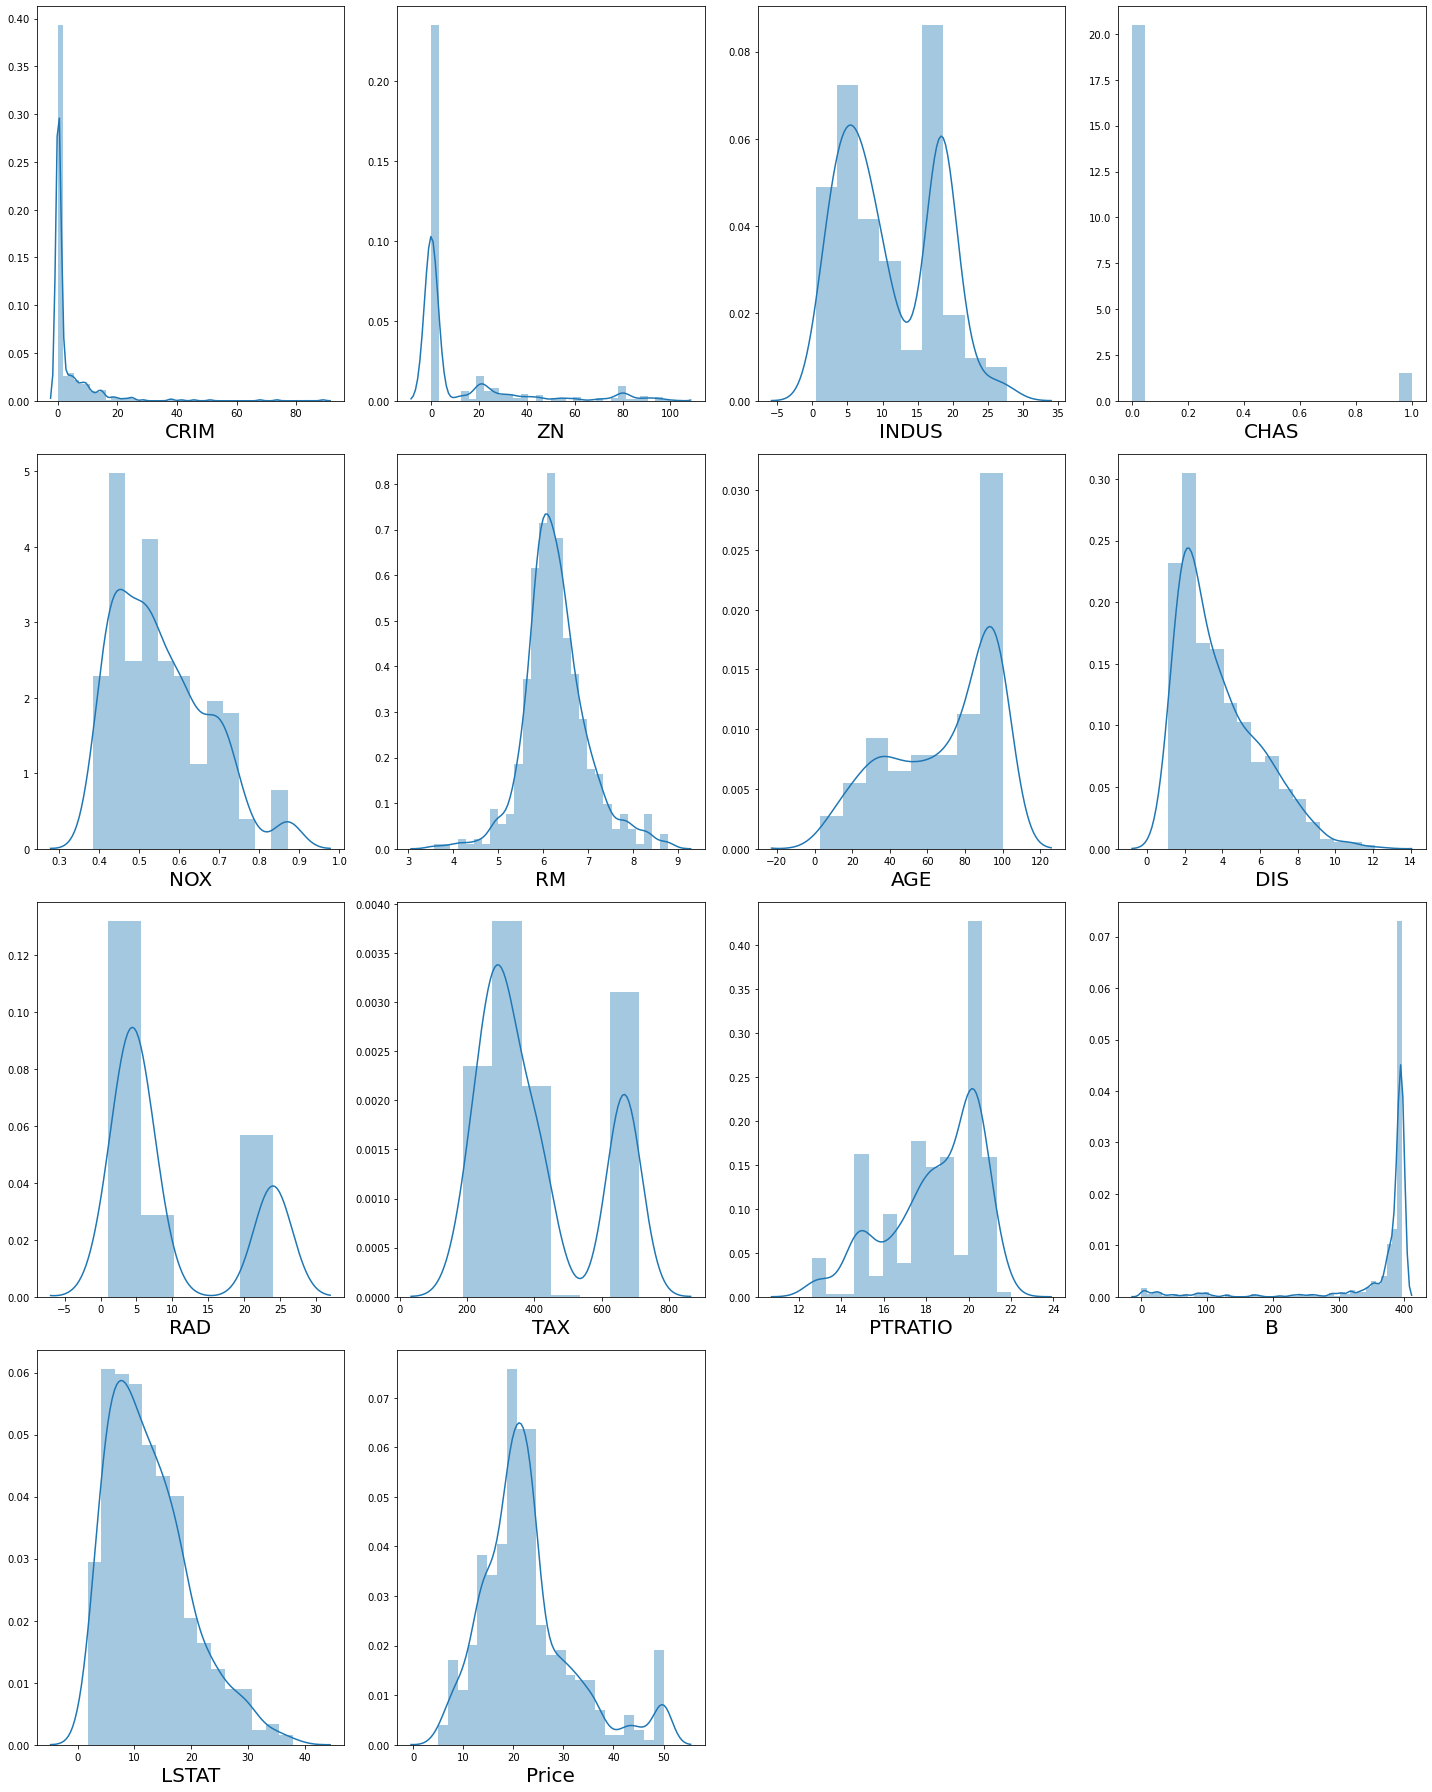

In [13]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos.columns:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Outlier Removal 

In [15]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [16]:
IQR = bos.CRIM.quantile(0.75)-bos.CRIM.quantile(0.25)
Lower_CRIM = bos['CRIM'].quantile(0.25) - (IQR*1.5)
Higher_CRIM =bos['CRIM'].quantile(0.75) + (IQR*1.5)
bos_CRIM = bos[(bos['CRIM']>Lower_CRIM) & (bos['CRIM']<Higher_CRIM)]

In [17]:
IQR = bos.ZN.quantile(0.75)-bos.ZN.quantile(0.25)
Lower_ZN = bos['ZN'].quantile(0.25) - (IQR*1.5)
Higher_ZN =  bos['ZN'].quantile(0.75) + (IQR*1.5)
bos_ZN = bos[(bos['ZN']>Lower_ZN) & (bos['ZN']<Higher_ZN)]

In [18]:
IQR = bos.RM.quantile(0.75)-bos.RM.quantile(0.25)
Lower_RM = bos['RM'].quantile(0.25) - (IQR*1.5)
Higher_RM =  bos['RM'].quantile(0.75) + (IQR*1.5)
bos_RM = bos[(bos_ind['RM']>Lower_RM) & (bos['RM']<Higher_RM)]

In [19]:
IQR = bos.DIS.quantile(0.75)-bos.DIS.quantile(0.25)
Lower_DIS = bos['DIS'].quantile(0.25) - (IQR*1.5)
Higher_DIS =  bos['DIS'].quantile(0.75) + (IQR*1.5)
bos_DIS = bos[(bos['DIS']>Lower_DIS) & (bos['DIS']<Higher_DIS)]

In [20]:
IQR = bos.PTRATIO.quantile(0.75)-bos.PTRATIO.quantile(0.25)
Lower_PTRATIO = bos['PTRATIO'].quantile(0.25) - (IQR*1.5)
Higher_PTRATIO =  bos['PTRATIO'].quantile(0.75) + (IQR*1.5)
bos_PTRATIO = bos[(bos['PTRATIO']>Lower_PTRATIO) & (bos['PTRATIO']<Higher_PTRATIO)]

In [21]:
IQR = bos.B.quantile(0.75)-bos.B.quantile(0.25)
Lower_B = bos['B'].quantile(0.25) - (IQR*1.5)
Higher_B =  bos['B'].quantile(0.75) + (IQR*1.5)
bos_B = bos[(bos['B']>Lower_B) & (bos['B']<Higher_B)]

In [22]:
IQR = bos.LSTAT.quantile(0.75)-bos.LSTAT.quantile(0.25)
Lower_LSTAT = bos['LSTAT'].quantile(0.25) - (IQR*1.5)
Higher_LSTAT =bos['LSTAT'].quantile(0.75) + (IQR*1.5)
bos = bos[(bos['LSTAT']>Lower_LSTAT) & (bos['LSTAT']<Higher_LSTAT)]

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


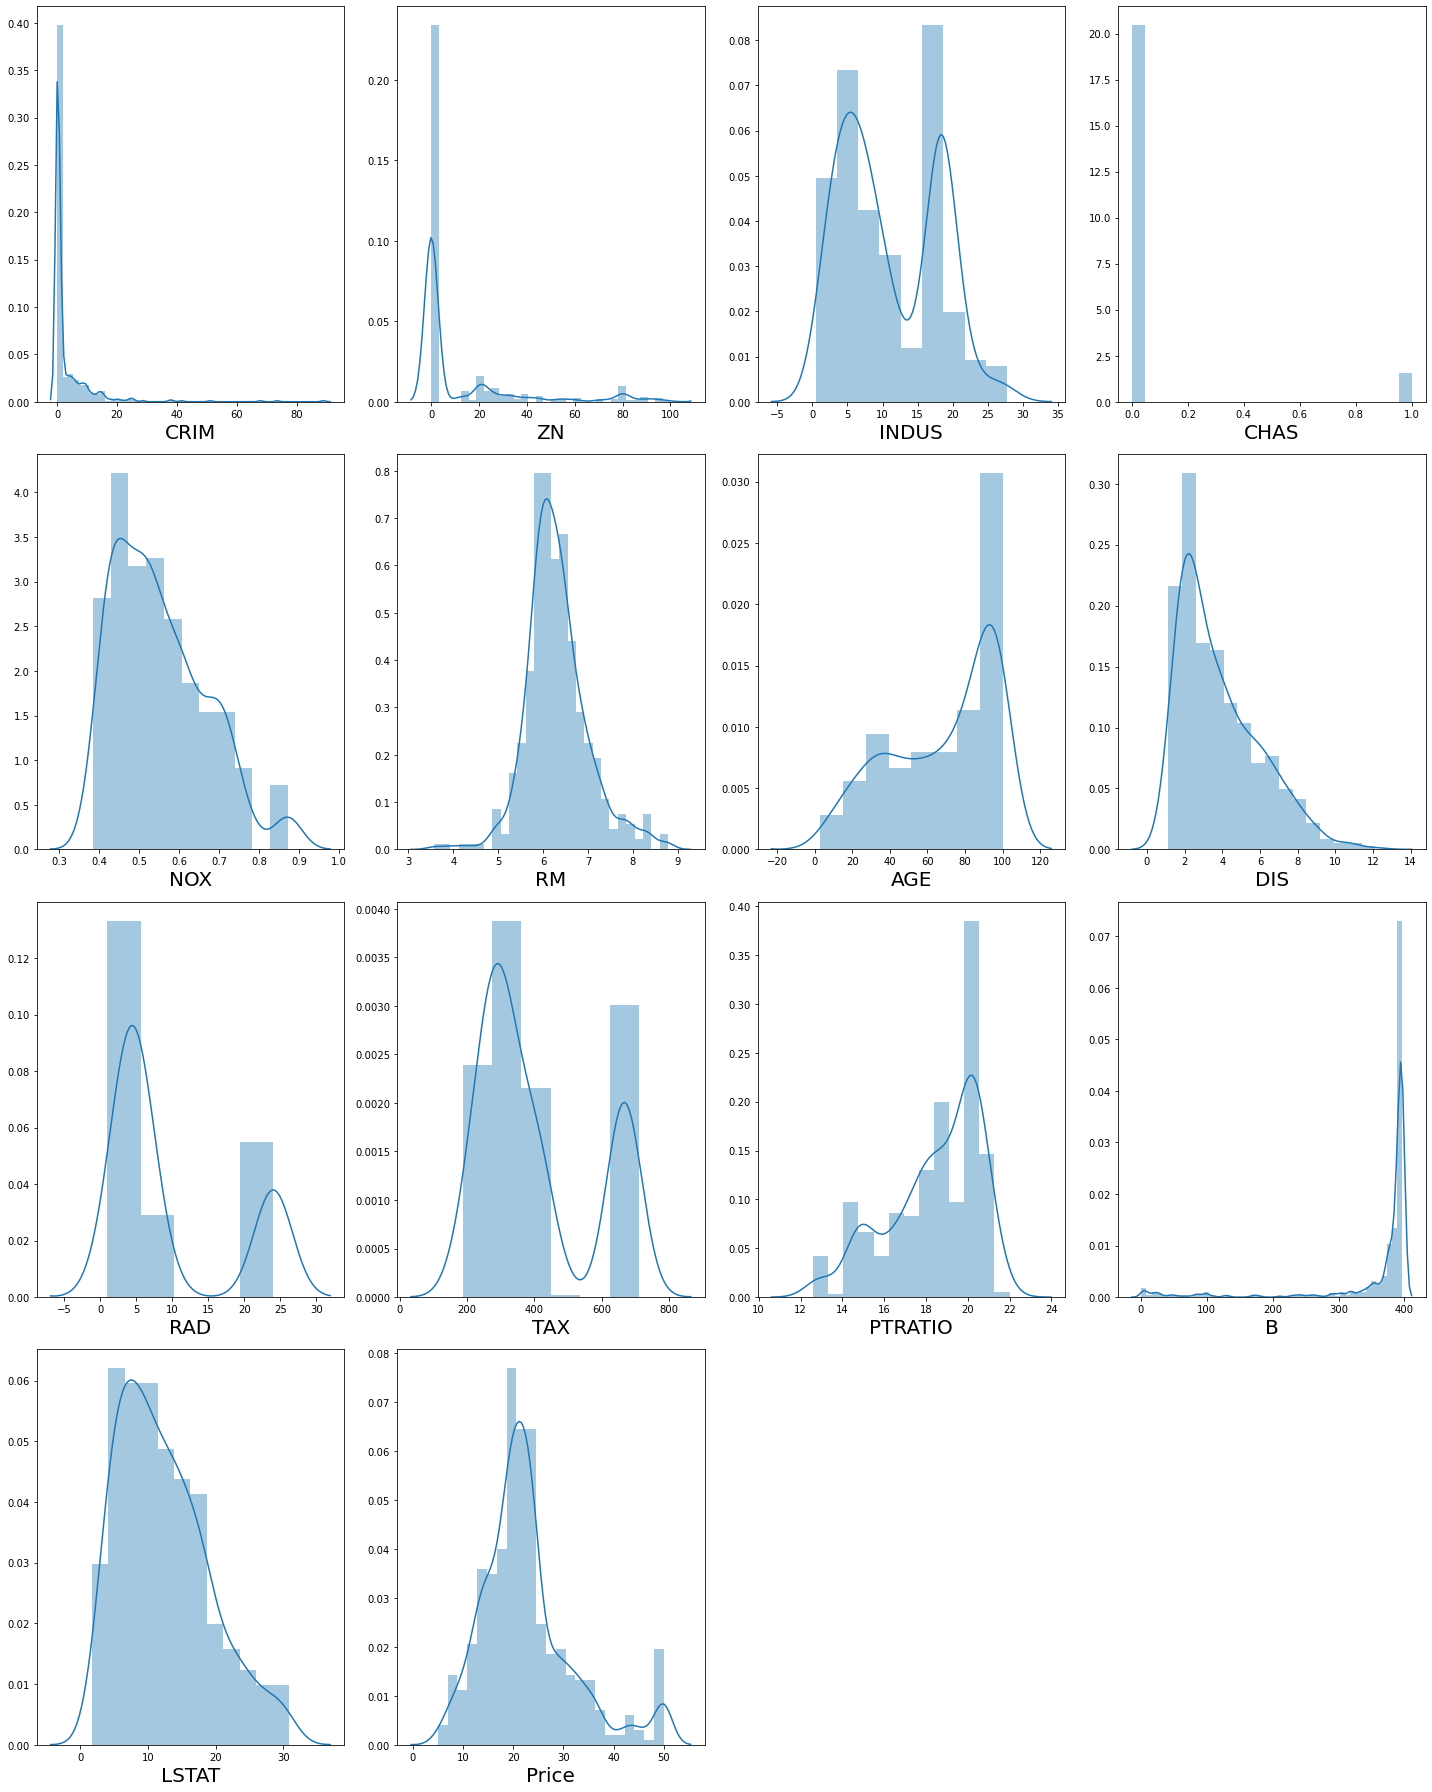

In [23]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos.columns:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Normalization

In [25]:
from scipy.stats import boxcox

In [51]:
for col in bos.columns:
    print(col)
    print('Feature Skewness   :', bos[col].skew())
    print('Log Transformation :', np.log1p(bos[col]).skew())
    print('Squre Root Transformation :',(bos[col]**(1/2)).skew())
    if (col not in ['ZN','CHAS','NOX','RAD','B']):
        print('Boxcox Transformation :', pd.Series(boxcox(bos[col])[0]).skew())
    else:
        print('Boxcox Transformation :', pd.Series(boxcox(bos[col]+5)[0]).skew())
    print('Exponential :', np.exp(bos[col]).skew())

CRIM
Feature Skewness   : 0.03728113852108282
Log Transformation : -0.7747540310904591
Squre Root Transformation : -0.49820568404136106
Boxcox Transformation : 0.04899785987699573
Exponential : 2.4182827353959637
ZN
Feature Skewness   : 1.158727090251307
Log Transformation : 1.0842551233527886
Squre Root Transformation : 1.075786588412199
Boxcox Transformation : 0.0
Exponential : 1.7663026642274917
INDUS
Feature Skewness   : -0.04686942534247531
Log Transformation : -0.4178477903121919
Squre Root Transformation : -0.29649066739420893
Boxcox Transformation : -0.12556097770981972
Exponential : 1.353522169100354
CHAS
Feature Skewness   : 3.376547279194473
Log Transformation : 3.37654727919447
Squre Root Transformation : 3.376547279194473
Boxcox Transformation : 0
Exponential : 3.376547279194472
NOX
Feature Skewness   : 0.06517780184463214
Log Transformation : -1.8235092752639988
Squre Root Transformation : nan
Boxcox Transformation : -0.012223212757744953
Exponential : 0.6464063314990355


In [34]:
bos['CRIM']=boxcox(bos['CRIM'])[0]

In [36]:
bos['ZN'] =bos['ZN']**(1/2)

In [37]:
bos['INDUS'] =bos['INDUS']**(1/2)

In [38]:
bos['NOX']=boxcox(bos['NOX'])[0]

In [40]:
bos['RM']=boxcox(bos['RM'])[0]

In [41]:
bos['AGE']=boxcox(bos['AGE'])[0]

In [42]:
bos['DIS']=boxcox(bos['DIS'])[0]

In [43]:
bos['RAD']=boxcox(bos['RAD'])[0]

In [44]:
bos['TAX']=boxcox(bos['TAX'])[0]

In [45]:
bos['PTRATIO']=boxcox(bos['PTRATIO'])[0]

In [46]:
bos['B']=boxcox(bos['B'])[0]

In [47]:
bos['LSTAT']=boxcox(bos['LSTAT'])[0]

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


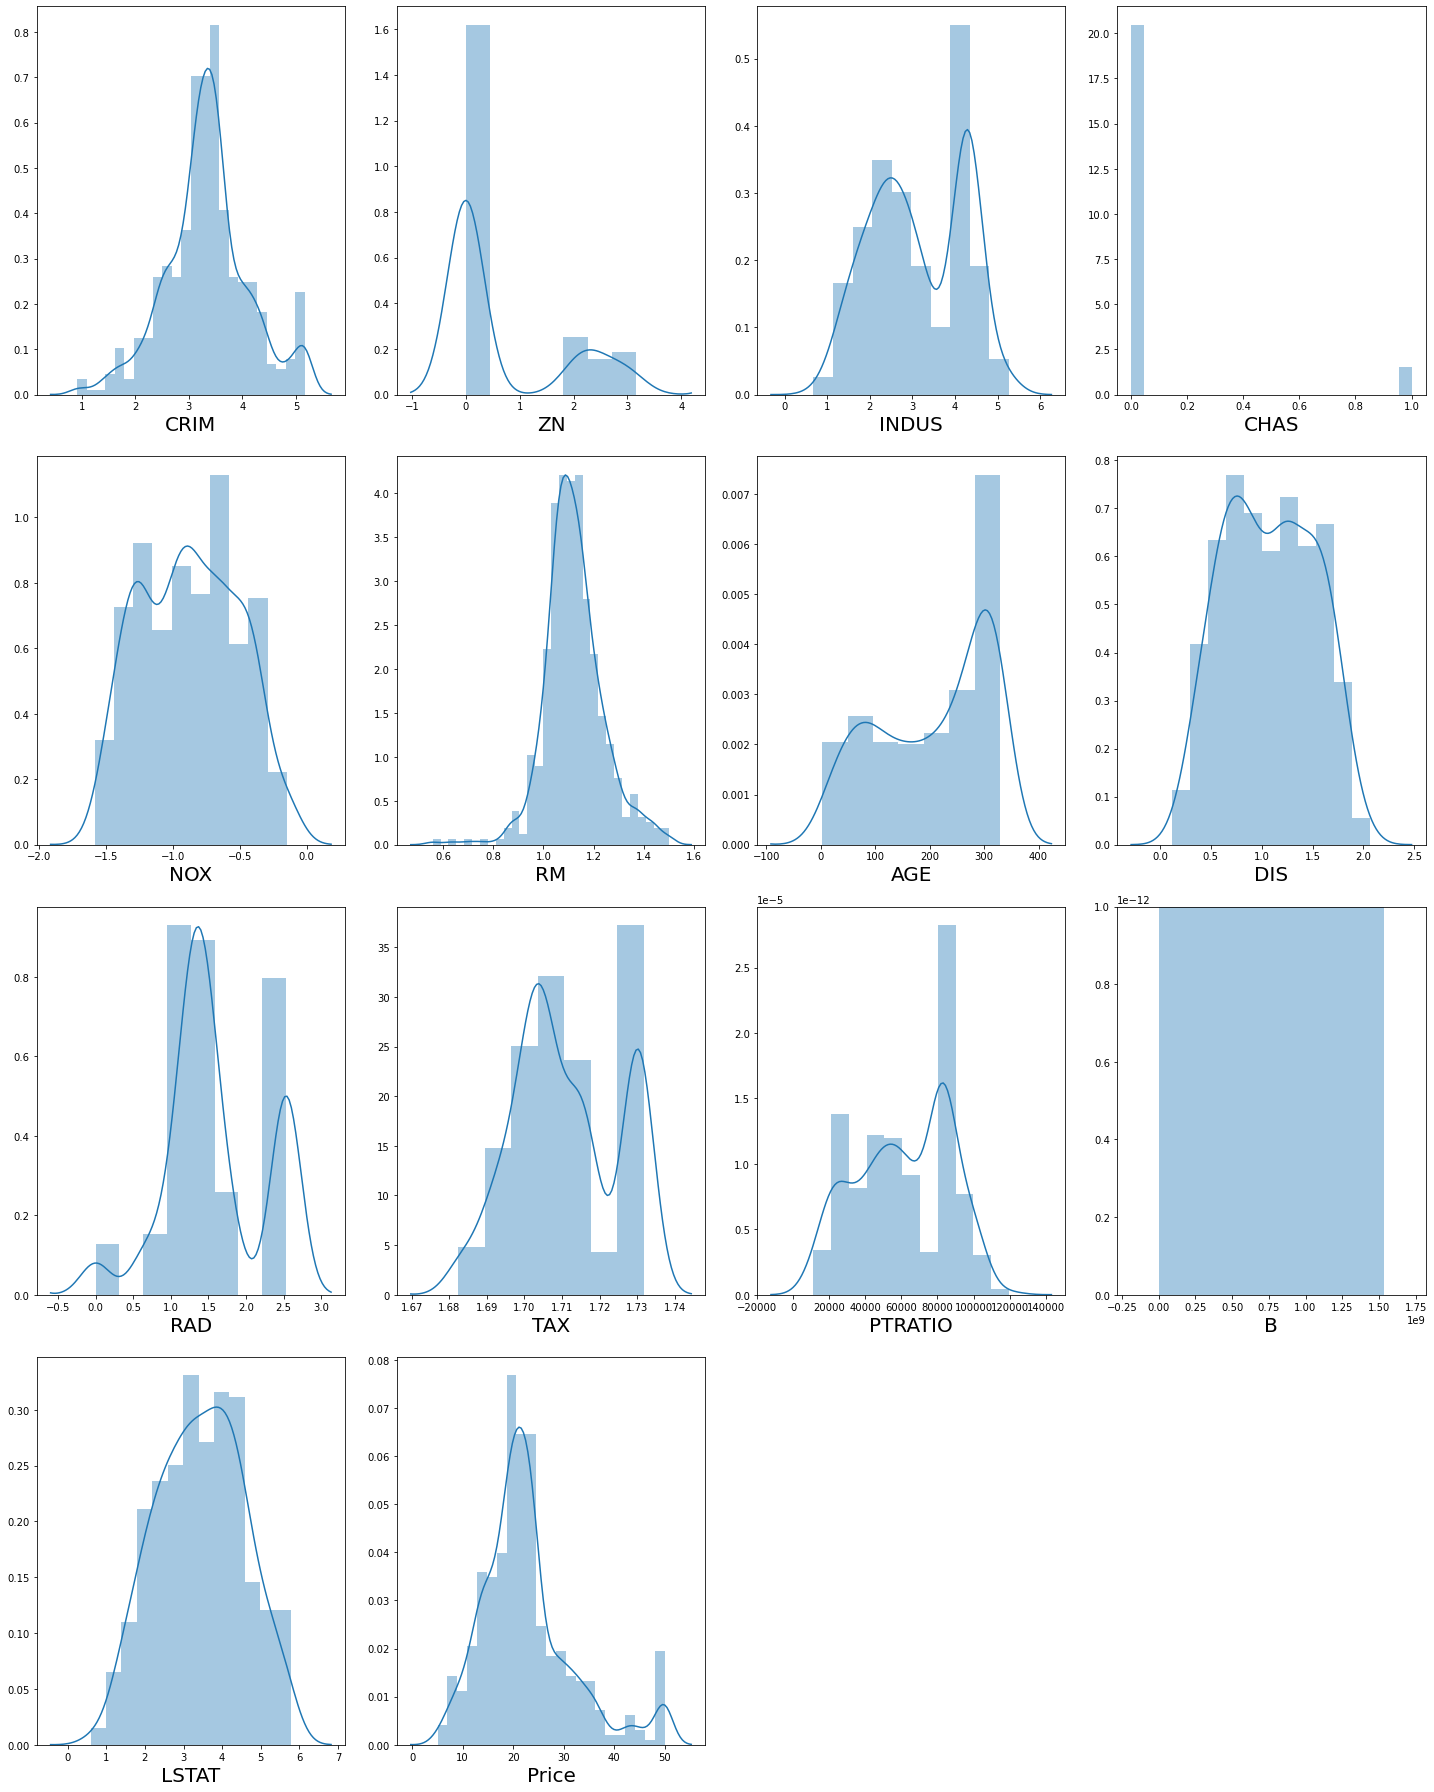

In [55]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos.columns:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [71]:
bos.columns[:]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [68]:
bos['CRIM'].astype('float64')

0      3.571207
1      3.362821
2      4.339019
3      4.256627
4      4.431133
         ...   
501    3.434213
502    3.270611
503    3.562858
504    3.398771
505    2.269684
Name: CRIM, Length: 499, dtype: float64

## Model Creation 

In [82]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(bos[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']],bos['Price'] , test_size=0.3, random_state=1)

In [94]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_scaled = std.fit_transform(X_train)

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
lm = LinearRegression()
lm.fit(X_scaled,y_train)

LinearRegression()

In [97]:
lm.coef_

array([ 8.21422902,  0.47123624, -0.30935082,  0.21035791, -0.60781894,
        0.77647685,  0.0898801 , -1.68654263,  0.49536948, -0.13609431,
        0.02653609, -0.14620126, -0.59410184])

In [98]:
lm.intercept_

22.66017191977077

In [99]:
from sklearn.metrics import r2_score

In [100]:
r2_score(y_test,lm.predict(std.fit_transform(X_test)))

0.9536836627813344

In [101]:
r2_score(y_train,lm.predict(std.fit_transform(X_train)))

0.9660865114947494